   Faculty ID       Name  Experience Designation  Designation Factor  Salary  \
0           1  Faculty_1          39   Professor                   1  109454   
1           2  Faculty_2          25   Professor                   1  146724   
2           3  Faculty_3          26   Professor                   1   81838   
3           4  Faculty_4          37   Professor                   1   99943   
4           5  Faculty_5          27   Professor                   1   86370   

   Gender  Publications  Patents  
0    Male            26        5  
1    Male            35        7  
2  Female            16        3  
3  Female             2        0  
4    Male            10        2  

Predicted Salaries:
Designation Factor 1, Experience 10 -> Predicted Salary: 107090.84
Designation Factor 2, Experience 15 -> Predicted Salary: 72973.30
Designation Factor 3, Experience 5 -> Predicted Salary: 35215.10

Predicted Patents:
Publications 5, Experience 5 -> Predicted Patents: 0.58
Publications 1

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


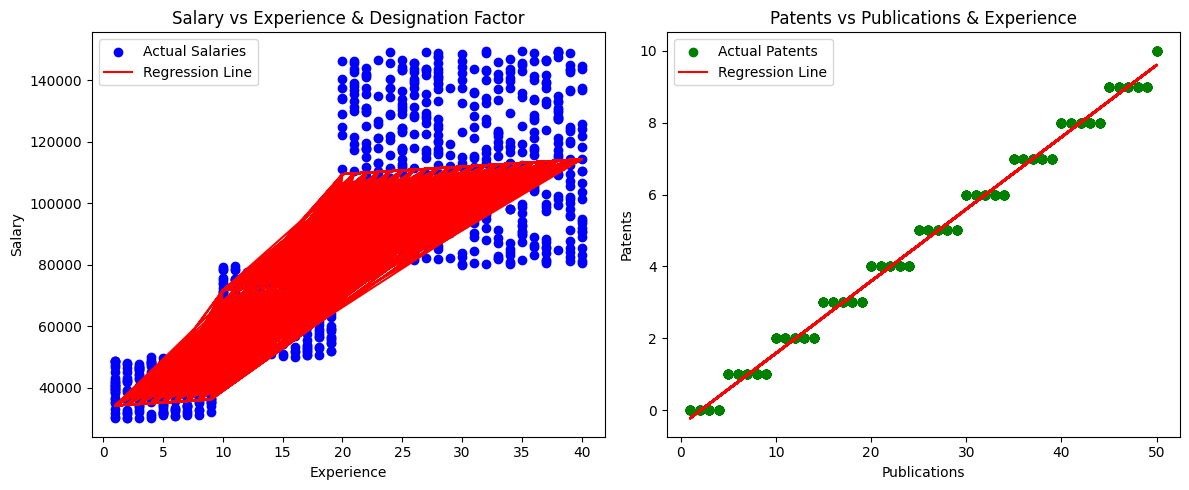

In [1]:
import random
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

num_records = 1000
faculty_data = []

designation_mapper = lambda exp: ("Professor", 1, 80000, 150000) if exp >= 20 else ("Associate Professor", 2, 50000, 80000) if exp >= 10 else ("Assistant Professor", 3, 30000, 50000)
salary_mapper = lambda min_salary, max_salary: random.randint(min_salary, max_salary)
patents_mapper = lambda publications: publications // 5

for i in range(1, num_records + 1):
    experience = random.randint(1, 40)
    designation, factor, min_salary, max_salary = designation_mapper(experience)
    salary = salary_mapper(min_salary, max_salary)
    publications = random.randint(1, 50)
    patents = patents_mapper(publications)
    gender = random.choice(["Male", "Female"])

    faculty_data.append({
        "Faculty ID": i,
        "Name": f"Faculty_{i}",
        "Experience": experience,
        "Designation": designation,
        "Designation Factor": factor,
        "Salary": salary,
        "Gender": gender,
        "Publications": publications,
        "Patents": patents,
    })


df = pd.DataFrame(faculty_data)
print(df.head())

X_salary = df[['Designation Factor', 'Experience']]
y_salary = df['Salary']
model_salary = LinearRegression().fit(X_salary, y_salary)


X_patents = df[['Publications', 'Experience']]
y_patents = df['Patents']
model_patents = LinearRegression().fit(X_patents, y_patents)


sample_inputs_salary = [[1, 10], [2, 15], [3, 5]]
designation_experience_predictions = model_salary.predict(sample_inputs_salary)

sample_inputs_patents = [[5, 5], [10, 10], [20, 15], [30, 25]]
publications_experience_predictions = model_patents.predict(sample_inputs_patents)

print("\nPredicted Salaries:")
for inputs, salary in zip(sample_inputs_salary, designation_experience_predictions):
    print(f"Designation Factor {inputs[0]}, Experience {inputs[1]} -> Predicted Salary: {salary:.2f}")

print("\nPredicted Patents:")
for inputs, patents in zip(sample_inputs_patents, publications_experience_predictions):
    print(f"Publications {inputs[0]}, Experience {inputs[1]} -> Predicted Patents: {patents:.2f}")


plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(df['Experience'], df['Salary'], color='blue', label='Actual Salaries')
plt.plot(df['Experience'], model_salary.predict(df[['Designation Factor', 'Experience']]), color='red', label='Regression Line')
plt.xlabel('Experience')
plt.ylabel('Salary')
plt.title('Salary vs Experience & Designation Factor')
plt.legend()

plt.subplot(1, 2, 2)
plt.scatter(df['Publications'], df['Patents'], color='green', label='Actual Patents')
plt.plot(df['Publications'], model_patents.predict(df[['Publications', 'Experience']]), color='red', label='Regression Line')
plt.xlabel('Publications')
plt.ylabel('Patents')
plt.title('Patents vs Publications & Experience')
plt.legend()

plt.tight_layout()
plt.show()


lol
